In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, losses, Model

import warnings
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

In [13]:
(x_train, _), (x_test, _)=tf.keras.datasets.mnist.load_data()
"""
Loads the MNIST dataset and splits it into training and test sets.

Returns:
    Tuple: A tuple containing the training and test data.
        - x_train: NumPy array of training images.
        - x_test: NumPy array of test images.

Note:
    The labels for the training and test data are not used and are discarded.
"""
# Loading the MNIST dataset

'\nLoads the MNIST dataset and splits it into training and test sets.\n\nReturns:\n    Tuple: A tuple containing the training and test data.\n        - x_train: NumPy array of training images.\n        - x_test: NumPy array of test images.\n\nNote:\n    The labels for the training and test data are not used and are discarded.\n'

In [14]:
# Normalize the training and test data to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Print the shapes of the training and test data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# Reshape the training and test data to be 2D arrays (flatten the images)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [16]:
# Define the size of the reduced representation
reduction_size = 32

# Build the encoder model
encoder = tf.keras.Sequential()
encoder.add(layers.Input(shape=x_train.shape[1:]))  # Input layer with the shape of the training data
encoder.add(layers.Dense(128, activation='relu'))  # First hidden layer with 128 units and ReLU activation
encoder.add(layers.Dense(64, activation='relu'))   # Second hidden layer with 64 units and ReLU activation
encoder.add(layers.Dense(reduction_size, activation='relu'))  # Output layer with the size of the reduced representation and ReLU activation
encoder.summary()  # Print the summary of the encoder model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
decoder = tf.keras.Sequential()
"""
Builds a decoder model using TensorFlow Keras Sequential API.

The decoder model consists of the following layers:
1. Input layer with shape (reduction_size,)
2. Dense layer with 64 units and ReLU activation
3. Dense layer with 128 units and ReLU activation
4. Dense layer with units equal to the first dimension of x_train's shape and ReLU activation

Finally, the model summary is printed.

Attributes:
    reduction_size (int): The size of the reduced dimensionality input.
    x_train (numpy.ndarray): The training data used to determine the output shape of the final Dense layer.

Returns:
    None
"""
decoder.add(layers.Input(shape=(reduction_size,)))
decoder.add(layers.Dense(64, activation='relu'))
decoder.add(layers.Dense(128, activation='relu'))
decoder.add(layers.Dense(x_train.shape[1:][0], activation='relu'))
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Define the input layer with the shape of the training data
input_layer = layers.Input(shape=x_train.shape[1:])


encoded = encoder(input_layer)  # Pass the input layer through the encoder to get the encoded representation
decoded = decoder(encoded)  # Pass the encoded representation through the decoder to get the reconstructed output
autoencoder = Model(inputs=input_layer, outputs=decoded)  # Create the autoencoder model by specifying the input and output layers
autoencoder.summary()   # Print the summary of the autoencoder model

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
def create_autoencoder(optimizer, loss):
    autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
    autoencoder.compile(optimizer=optimizer, loss=loss)
    return autoencoder

# Create and compile autoencoder models with different optimizer-loss combinations
autoencoder_adam_bce = create_autoencoder('adam', 'binary_crossentropy')
autoencoder_sgd_mse = create_autoencoder('sgd', 'mean_squared_error')
autoencoder_rmsprop_mae = create_autoencoder('rmsprop', 'mean_absolute_error')
autoencoder_adam_mse = create_autoencoder('adam', 'mean_squared_error')
autoencoder_adam_mae = create_autoencoder('adam', 'mean_absolute_error')
autoencoder_adamw_bce = create_autoencoder('adamw', 'binary_crossentropy')
autoencoder_adamw_mse = create_autoencoder('adamw', 'mean_squared_error')
autoencoder_adamw_mae = create_autoencoder('adamw', 'mean_absolute_error')
autoencoder_sgd_bce = create_autoencoder('sgd', 'binary_crossentropy')
autoencoder_sgd_mae = create_autoencoder('sgd', 'mean_absolute_error')
autoencoder_rmsprop_bce = create_autoencoder('rmsprop', 'binary_crossentropy')
autoencoder_rmsprop_mse = create_autoencoder('rmsprop', 'mean_squared_error')

In [23]:
# Define a function to fit the autoencoder with different optimizer-loss combinations
def fit_autoencoder(autoencoder, x_train, x_test, epochs=10, batch_size=256):
    return autoencoder.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(x_test, x_test))

# Dictionary to store the histories
histories = {}

# List of autoencoders and their labels
autoencoders = [
    (autoencoder_adam_bce, 'adam_bce'),
    (autoencoder_sgd_mse, 'sgd_mse'),
    (autoencoder_rmsprop_mae, 'rmsprop_mae'),
    (autoencoder_adam_mse, 'adam_mse'),
    (autoencoder_adam_mae, 'adam_mae'),
    (autoencoder_adamw_bce, 'adamw_bce'),
    (autoencoder_adamw_mse, 'adamw_mse'),
    (autoencoder_adamw_mae, 'adamw_mae'),
    (autoencoder_sgd_bce, 'sgd_bce'),
    (autoencoder_sgd_mae, 'sgd_mae'),
    (autoencoder_rmsprop_bce, 'rmsprop_bce'),
    (autoencoder_rmsprop_mse, 'rmsprop_mse')
]

# Fit each autoencoder and store the history
for autoencoder, label in autoencoders:
    histories[label] = fit_autoencoder(autoencoder, x_train, x_test)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1794 - val_loss: 0.2069
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2091 - val_loss: 0.2012
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2087 - val_loss: 0.2139
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1949 - val_loss: 0.1850
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2114 - val_loss: 0.1945
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2086 - val_loss: 0.1861
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2037 - val_loss: 0.1942
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1932 - val_loss: 0.1807
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2146 - val_loss: 0.2459
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2361 - val_loss: 0.2254
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0344 - val_loss: 0.0327
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

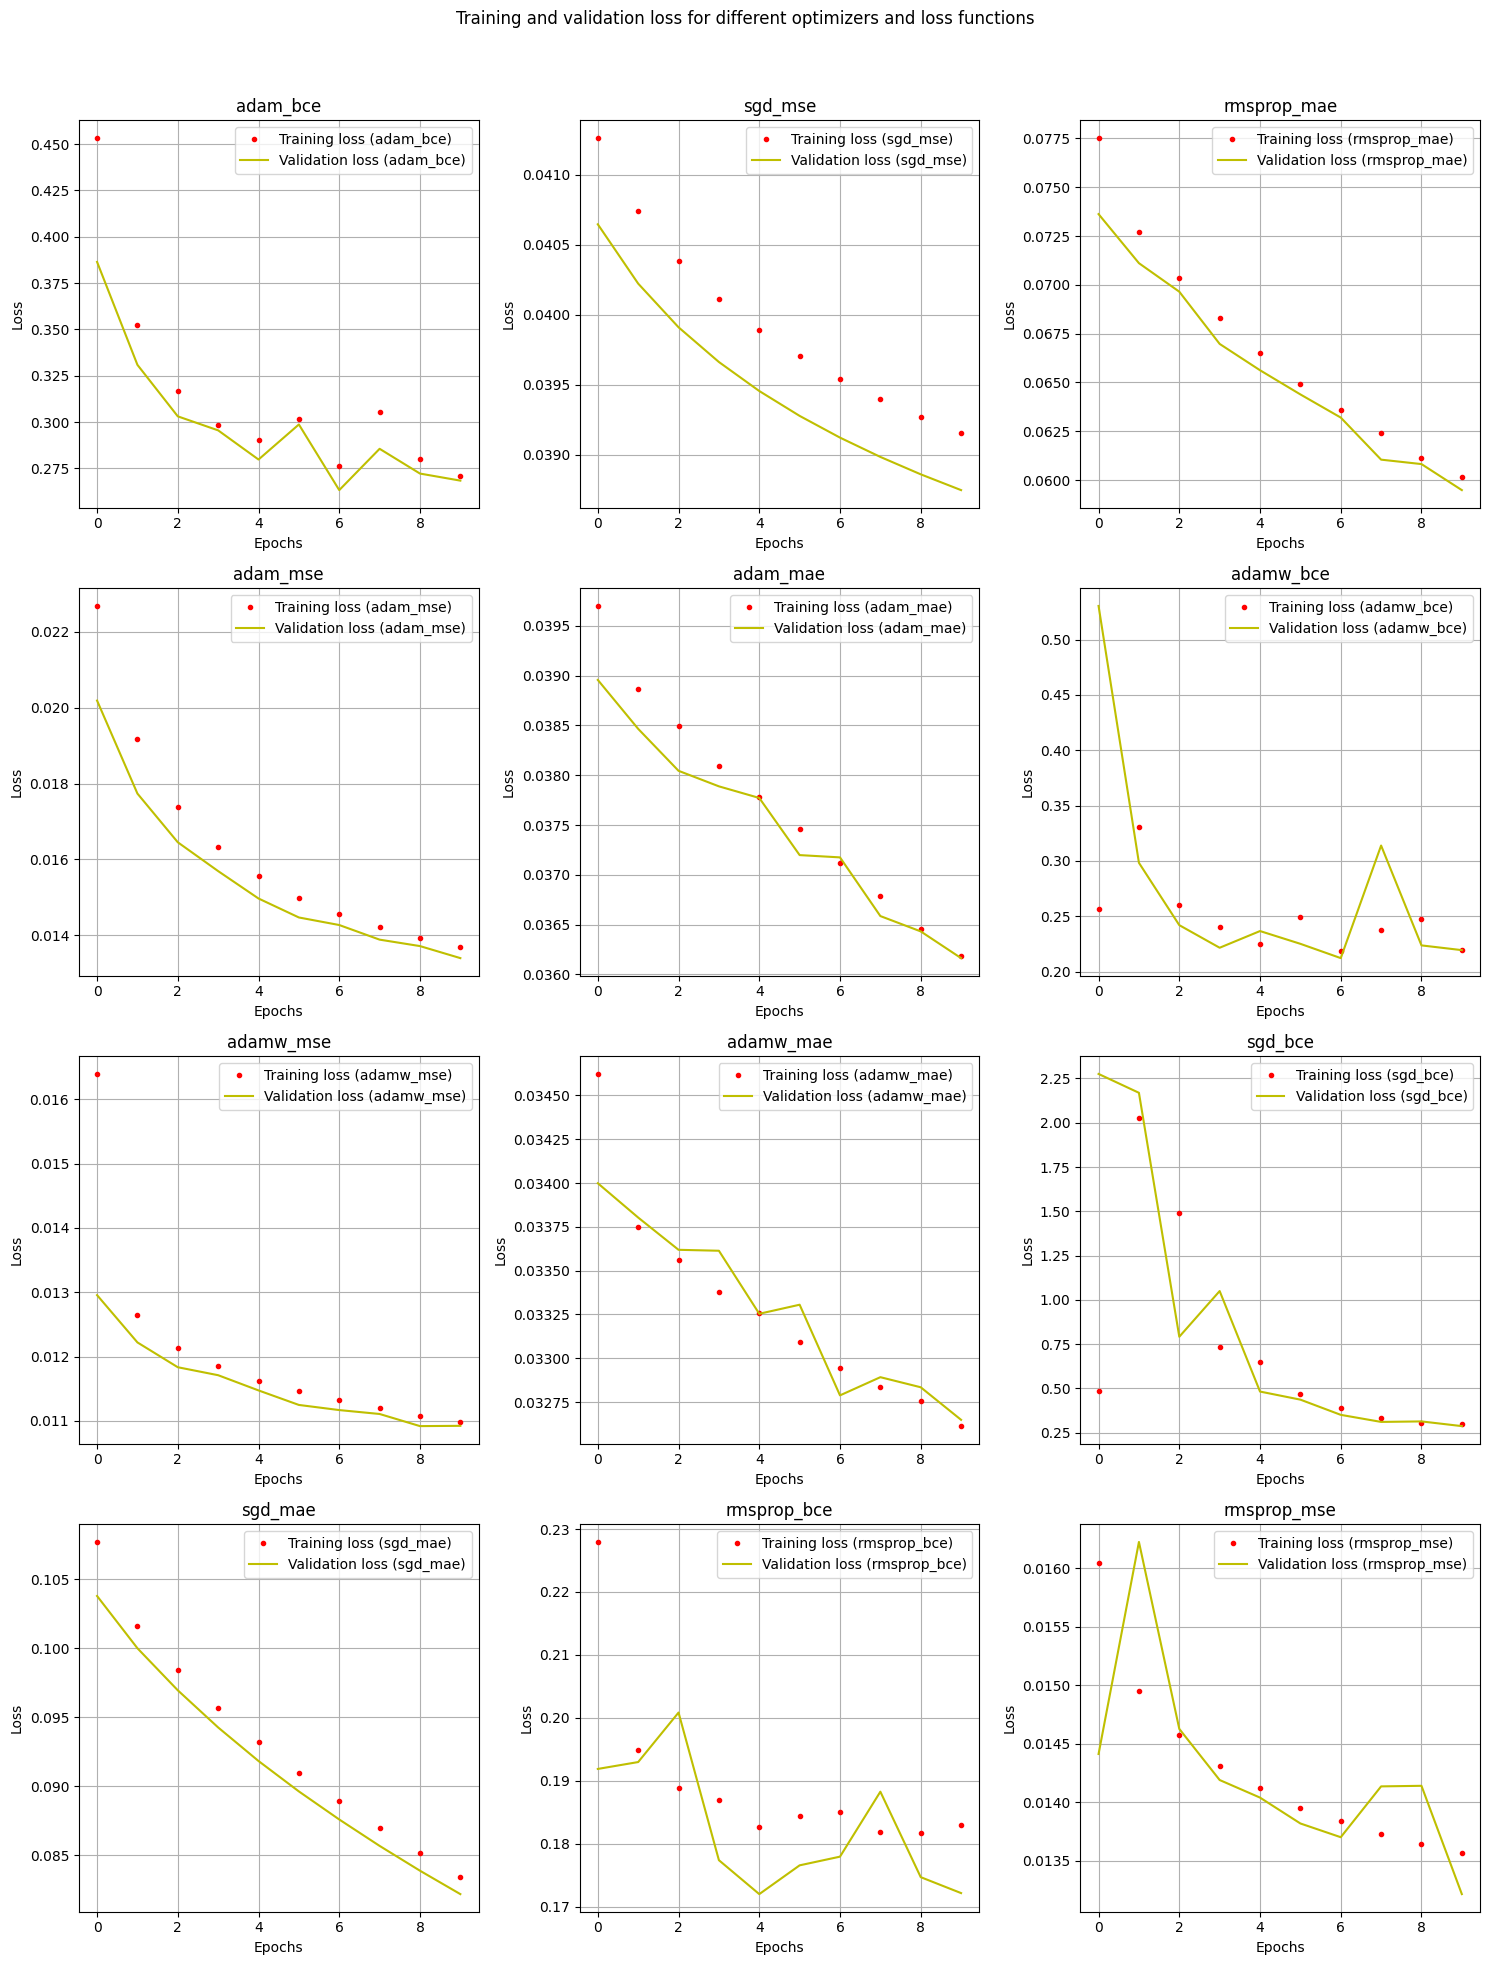

In [21]:
import os
import matplotlib.pyplot as plt

# Ensure the directory exists
save_dir = './figures'
os.makedirs(save_dir, exist_ok=True)

# Create subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Training and validation loss for different optimizers and loss functions')

# List of histories and labels
histories = [
    (history_adam_bce, 'adam_bce'),
    (history_sgd_mse, 'sgd_mse'),
    (history_rmsprop_mae, 'rmsprop_mae'),
    (history_adam_mse, 'adam_mse'),
    (history_adam_mae, 'adam_mae'),
    (history_adamw_bce, 'adamw_bce'),
    (history_adamw_mse, 'adamw_mse'),
    (history_adamw_mae, 'adamw_mae'),
    (history_sgd_bce, 'sgd_bce'),
    (history_sgd_mae, 'sgd_mae'),
    (history_rmsprop_bce, 'rmsprop_bce'),
    (history_rmsprop_mse, 'rmsprop_mse')
]

# Plot each history in a subplot
for ax, (history, label) in zip(axs.flatten(), histories):
    epochs = range(len(history.history['loss']))
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    ax.plot(epochs, loss, 'r.', label=f'Training loss ({label})')
    ax.plot(epochs, val_loss, 'y', label=f'Validation loss ({label})')
    ax.set_title(label)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid()
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(os.path.join(save_dir, 'history_training_all.png'), dpi=300, bbox_inches='tight')
plt.show()


In [25]:
# Evaluate autoencoder models with different optimizer-loss combinations
loss_adam_bce = autoencoder_adam_bce.evaluate(x_train, x_train)
loss_sgd_mse = autoencoder_sgd_mse.evaluate(x_train, x_train)
loss_rmsprop_mae = autoencoder_rmsprop_mae.evaluate(x_train, x_train)
loss_adam_mse = autoencoder_adam_mse.evaluate(x_train, x_train)
loss_adam_mae = autoencoder_adam_mae.evaluate(x_train, x_train)
loss_adamw_bce = autoencoder_adamw_bce.evaluate(x_train, x_train)
loss_adamw_mse = autoencoder_adamw_mse.evaluate(x_train, x_train)
loss_adamw_mae = autoencoder_adamw_mae.evaluate(x_train, x_train)
loss_sgd_bce = autoencoder_sgd_bce.evaluate(x_train, x_train)
loss_sgd_mae = autoencoder_sgd_mae.evaluate(x_train, x_train)
loss_rmsprop_bce = autoencoder_rmsprop_bce.evaluate(x_train, x_train)
loss_rmsprop_mse = autoencoder_rmsprop_mse.evaluate(x_train, x_train)


# Print all losses
print(f"Loss (adam_bce): {loss_adam_bce}")
print(f"Loss (sgd_mse): {loss_sgd_mse}")
print(f"Loss (rmsprop_mae): {loss_rmsprop_mae}")
print(f"Loss (adam_mse): {loss_adam_mse}")
print(f"Loss (adam_mae): {loss_adam_mae}")
print(f"Loss (adamw_bce): {loss_adamw_bce}")
print(f"Loss (adamw_mse): {loss_adamw_mse}")
print(f"Loss (adamw_mae): {loss_adamw_mae}")
print(f"Loss (sgd_bce): {loss_sgd_bce}")
print(f"Loss (sgd_mae): {loss_sgd_mae}")
print(f"Loss (rmsprop_bce): {loss_rmsprop_bce}")
print(f"Loss (rmsprop_mse): {loss_rmsprop_mse}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1601
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0130
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0391
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0130
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0391
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1601
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0130
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0391
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1601
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0391
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1601
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0130
Loss (adam_bce): 0.16034619510173798
Loss (sgd_mse): 0.013090269640088081
Loss (rmsprop_mae): 0.039221927523612976
Loss (adam_mse): 0.013090269640088081
Loss (adam_mae): 0.039221927523612976
Loss (adamw_bce): 0.16034619510173798
Loss (adamw_mse): 0.013090269640088081
Loss (adamw_mae): 0.0392219275236129

In [26]:
# Encode and decode images using with different optimizer-loss combinations
optimizers_losses = {
    'adam_bce': ('adam', 'binary_crossentropy'),
    'sgd_mse': ('sgd', 'mean_squared_error'),
    'rmsprop_mae': ('rmsprop', 'mean_absolute_error'),
    'adam_mse': ('adam', 'mean_squared_error'),
    'adam_mae': ('adam', 'mean_absolute_error'),
    'adamw_bce': ('adamw', 'binary_crossentropy'),
    'adamw_mse': ('adamw', 'mean_squared_error'),
    'adamw_mae': ('adamw', 'mean_absolute_error'),
    'sgd_bce': ('sgd', 'binary_crossentropy'),
    'sgd_mae': ('sgd', 'mean_absolute_error'),
    'rmsprop_bce': ('rmsprop', 'binary_crossentropy'),
    'rmsprop_mse': ('rmsprop', 'mean_squared_error')
}

encoded_decoded_imgs = {}

for label, _ in optimizers_losses.items():
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    encoded_decoded_imgs[label] = (encoded_imgs, decoded_imgs)

encoded_imgs_adam_bce, decoded_imgs_adam_bce = encoded_decoded_imgs['adam_bce']
encoded_imgs_sgd_mse, decoded_imgs_sgd_mse = encoded_decoded_imgs['sgd_mse']
encoded_imgs_rmsprop_mae, decoded_imgs_rmsprop_mae = encoded_decoded_imgs['rmsprop_mae']
encoded_imgs_adam_mse, decoded_imgs_adam_mse = encoded_decoded_imgs['adam_mse']
encoded_imgs_adam_mae, decoded_imgs_adam_mae = encoded_decoded_imgs['adam_mae']
encoded_imgs_adamw_bce, decoded_imgs_adamw_bce = encoded_decoded_imgs['adamw_bce']
encoded_imgs_adamw_mse, decoded_imgs_adamw_mse = encoded_decoded_imgs['adamw_mse']
encoded_imgs_adamw_mae, decoded_imgs_adamw_mae = encoded_decoded_imgs['adamw_mae']
encoded_imgs_sgd_bce, decoded_imgs_sgd_bce = encoded_decoded_imgs['sgd_bce']
encoded_imgs_sgd_mae, decoded_imgs_sgd_mae = encoded_decoded_imgs['sgd_mae']
encoded_imgs_rmsprop_bce, decoded_imgs_rmsprop_bce = encoded_decoded_imgs['rmsprop_bce']
encoded_imgs_rmsprop_mse, decoded_imgs_rmsprop_mse = encoded_decoded_imgs['rmsprop_mse']


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━

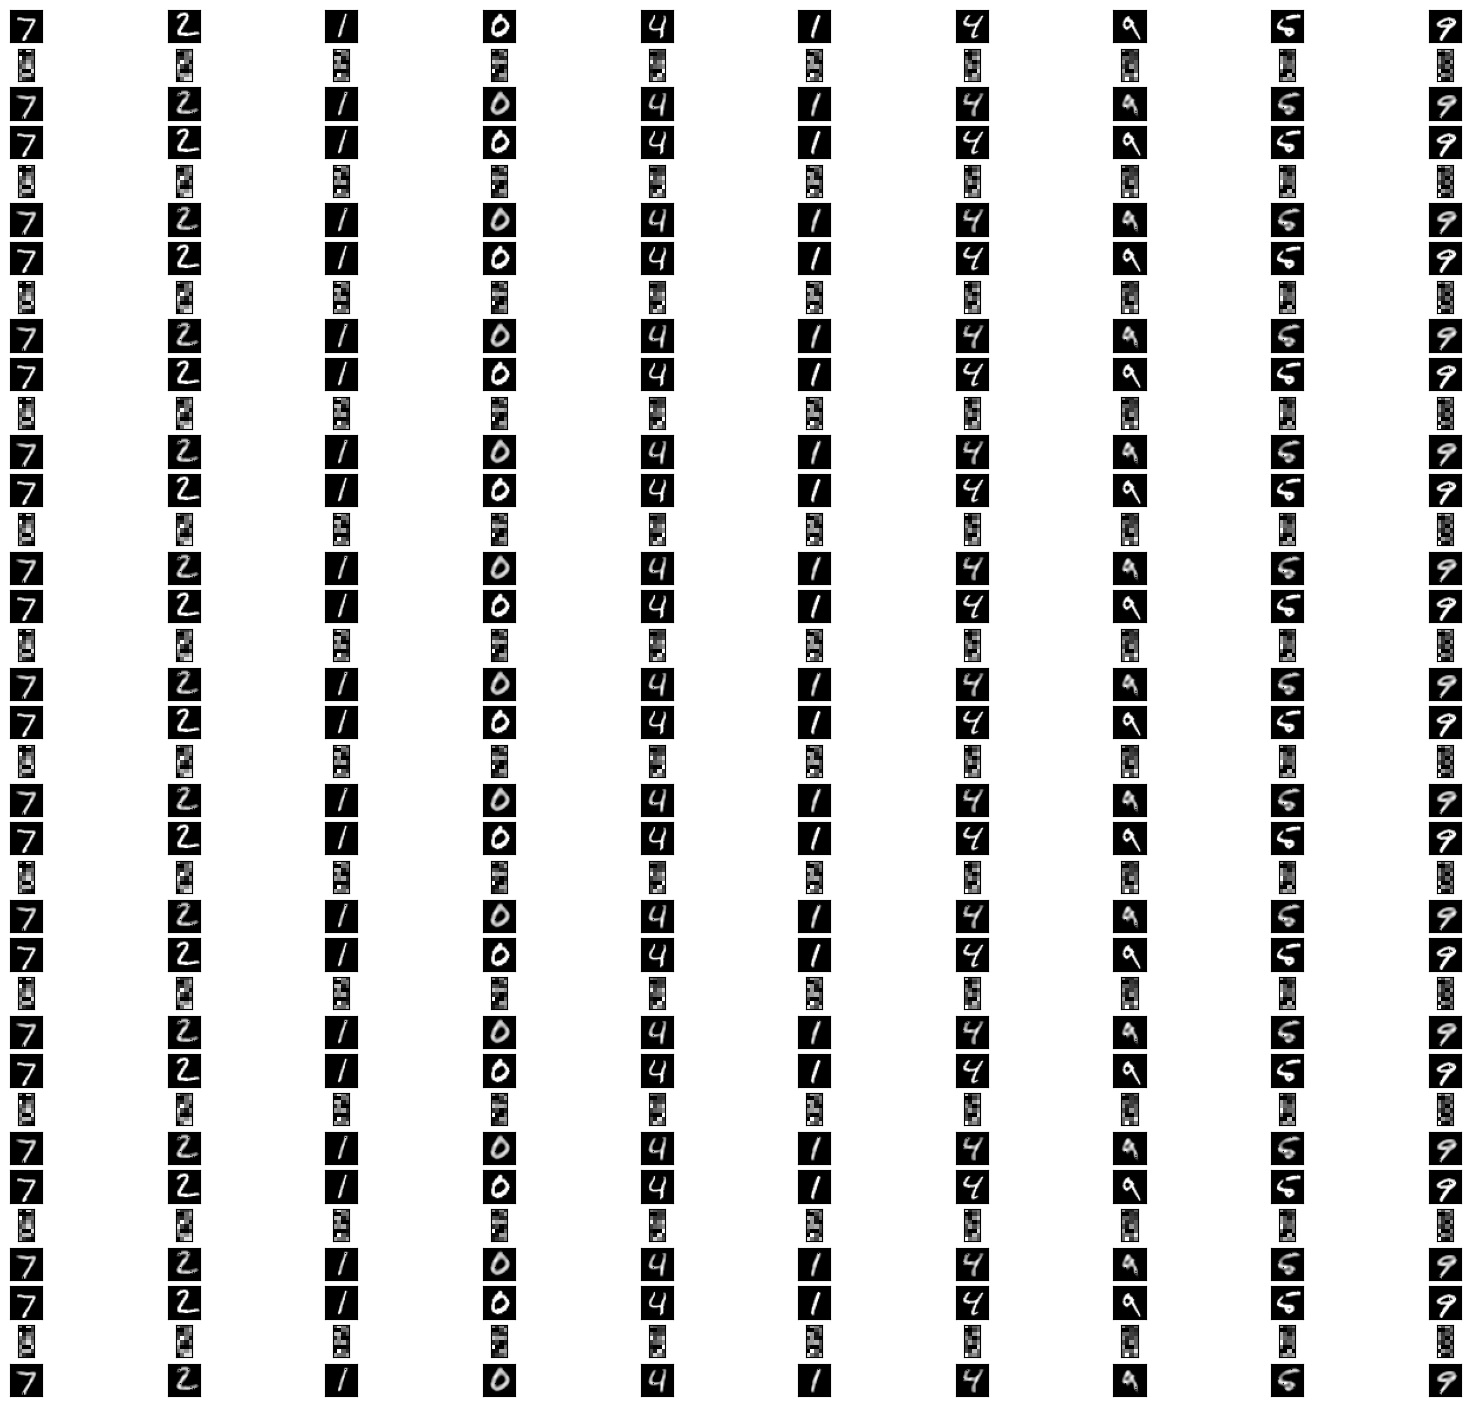

In [27]:
n = 10  # Quantidade de dígitos para mostrar
plt.figure(figsize=(20, 18))

# Define optimizer-loss combinations to visualize
combinations = [
    ('adam_bce', encoded_imgs_adam_bce, decoded_imgs_adam_bce),
    ('sgd_mse', encoded_imgs_sgd_mse, decoded_imgs_sgd_mse),
    ('rmsprop_mae', encoded_imgs_rmsprop_mae, decoded_imgs_rmsprop_mae),
    ('adam_mse', encoded_imgs_adam_mse, decoded_imgs_adam_mse),
    ('adam_mae', encoded_imgs_adam_mae, decoded_imgs_adam_mae),
    ('adamw_bce', encoded_imgs_adamw_bce, decoded_imgs_adamw_bce),
    ('adamw_mse', encoded_imgs_adamw_mse, decoded_imgs_adamw_mse),
    ('adamw_mae', encoded_imgs_adamw_mae, decoded_imgs_adamw_mae),
    ('sgd_bce', encoded_imgs_sgd_bce, decoded_imgs_sgd_bce),
    ('sgd_mae', encoded_imgs_sgd_mae, decoded_imgs_sgd_mae),
    ('rmsprop_bce', encoded_imgs_rmsprop_bce, decoded_imgs_rmsprop_bce),
    ('rmsprop_mse', encoded_imgs_rmsprop_mse, decoded_imgs_rmsprop_mse)
]

# Generate subplots for all combinations
for idx, (label, encoded_imgs, decoded_imgs) in enumerate(combinations):
    for i in range(n):
        # Original images
        ax = plt.subplot(len(combinations) * 3, n, i + 1 + idx * n * 3)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Encoded images
        ax = plt.subplot(len(combinations) * 3, n, i + 1 + n + idx * n * 3)
        plt.imshow(encoded_imgs[i].reshape(8, 4))  # Adjusting visualization for encoding
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed images
        ax = plt.subplot(len(combinations) * 3, n, i + 1 + 2 * n + idx * n * 3)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)




plt.savefig('.\\figures\\autoencoder_results_all.png', dpi=300, bbox_inches='tight')
plt.show()